# Task # 2 - To Explore Supervised Machine Learning

### LINEAR REGRESSION:

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.

### Regression Mechanics:

Y = ax+b
  - y = Target
  - x = Singlefeature
  - a,b = Parameters of model
  

### Problem Statement:

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

##  Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the dataset

EDA:-The dataset conatains two columns and 25 rows it contains the number of hours and scores of 25 people

In [5]:
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)

In [8]:
# Viewed top 10 rows of the dataframe using head() method
score_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# Summary of the dataframe using info() method
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
# summary statistics of the dataframe using describe() method
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# Dimensions of the dataframe using shape attribute
score_data.shape

(25, 2)

## Visual Exploratory Data

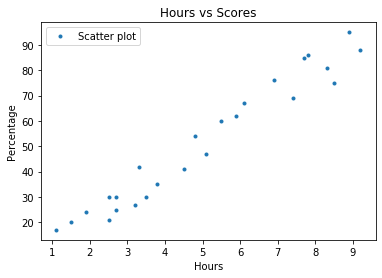

In [32]:
# Plotting the distribution of scores
score_data.plot(x='Hours', y='Scores',label = "Scatter plot",style = ".")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage")  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

## Preparing the data

Independent variable or input variable = Feature variable = x<br>
Dependent variable or output variable = Target variable = y

In [38]:
x = score_data.drop(["Scores"],axis=1)  
y = score_data["Scores"]  

## Split the datset

Split the data into training and test datasets, we'll do this by using Scikit-Learn's built-in train_test_split() method<br>
The model learn the relationships from the training data and predict on the test data

In [42]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)

## Traning the Algorithm

I have split the data into training and testing sets, and now i ll train the algorithm using LinearRegressor method,then instaniate the regressor and fit it on the traning set using the fit() method<br>
In this step the model learned the relationships between the training data ie,x_train and y_train.Now the model is ready to make predictionson the test data using the predict() method

In [50]:
from sklearn.linear_model import LinearRegression  
linear_reg = LinearRegression()  
linear_reg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the data

Now that we have trained our algorithm, it's time to make some predictions.

In [64]:
print(x_test)
y_pred = linear_reg.predict(x_test)
df_pred = pd.DataFrame(y_pred, index=x_test.index, columns=['y_pred'])
print(df_pred)

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
9     2.7
13    3.3
1     5.1
       y_pred
8   83.391686
16  27.070549
0   27.070549
23  69.796929
11  60.086388
9   29.012657
13  34.838982
1   52.317955


In [66]:
# Comparing Actual vs Predicted
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
score

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


## Predict custom data

In [71]:
print("Predicted score for 9.25 hours of study is :",linear_reg.predict([[9.25]]))

Predicted score for 9.25 hours of study is : [92.61670034]


## Regression metrics for model performance

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.For Regression problems,there are MAE[Mean Absolute Error],RMSE[Root Mean Square Error],R2[R-squared value].For instance here, we have chosen the mean square error

In [88]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean squared Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.499999999999998
Root Mean Squared Error: 4.859985351228103
Mean squared Error: 23.61945761415174


### Plot the Regression line

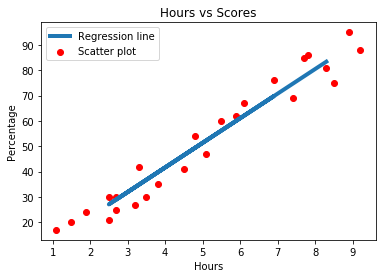

In [81]:
plt.scatter(x,y,label="Scatter plot",color="r")
plt.plot(x_test,y_pred,linewidth=4,label="Regression line")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.legend(loc=2)
plt.show()

## Conclusion

The model we have built can be used for inference of how the different predictors influence the outcome.It helps by providing good estimations of the significant relations between the predictors and the outcome. These estimations can be used to summarize the data in a more useful and presentful way.<br>
According to the problem statement we can say that if a person studies for 9.25 hours the predicted score would 92 marks.